# Training a model with a curated image dataset in fastai
Walkthrough of how to train a deep learning model in fastai with a curated image dataset


In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

# Ingest the dataset
- create a path object
- defined an ImageDataLoaders object

In [3]:
# ingest the curated image dataset CIFAR
path = untar_data(URLs.CIFAR)

In [4]:
# examine the directory structure of the dataset
path.ls()

(#3) [Path('/storage/data/cifar10/train'),Path('/storage/data/cifar10/labels.txt'),Path('/storage/data/cifar10/test')]

In [5]:
'''pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
'''
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label)

In [6]:
dls = db.dataloaders(path,bs=32)

In [7]:
# dls = db.dataloaders(path,bs=32)
#dls = ImageDataLoaders.from_folder(path, train='train', valid='test')

In [8]:
# summary must be run on DataBlock object, not dataloaders object
db.summary(path/"train")



Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying parent_label gives
      truck
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(9))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}

Building one batch
Applying item_tfms to the firs

# Examine the dataset

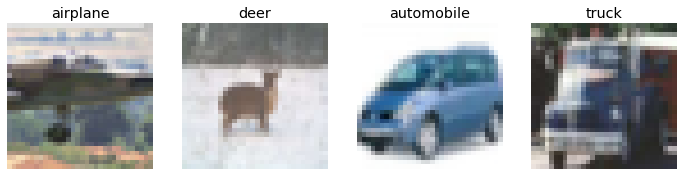

In [9]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


In [10]:
# examine the train subdirectory
(path/'train').ls()

(#10) [Path('/storage/data/cifar10/train/horse'),Path('/storage/data/cifar10/train/dog'),Path('/storage/data/cifar10/train/ship'),Path('/storage/data/cifar10/train/frog'),Path('/storage/data/cifar10/train/truck'),Path('/storage/data/cifar10/train/deer'),Path('/storage/data/cifar10/train/airplane'),Path('/storage/data/cifar10/train/automobile'),Path('/storage/data/cifar10/train/cat'),Path('/storage/data/cifar10/train/bird')]

In [11]:
(path/'train/dog').ls()

(#5000) [Path('/storage/data/cifar10/train/dog/26785_dog.png'),Path('/storage/data/cifar10/train/dog/47662_dog.png'),Path('/storage/data/cifar10/train/dog/48730_dog.png'),Path('/storage/data/cifar10/train/dog/40889_dog.png'),Path('/storage/data/cifar10/train/dog/24363_dog.png'),Path('/storage/data/cifar10/train/dog/44046_dog.png'),Path('/storage/data/cifar10/train/dog/26962_dog.png'),Path('/storage/data/cifar10/train/dog/19003_dog.png'),Path('/storage/data/cifar10/train/dog/47416_dog.png'),Path('/storage/data/cifar10/train/dog/31111_dog.png')...]

In [12]:
(path/'train/cat').ls()

(#5000) [Path('/storage/data/cifar10/train/cat/1845_cat.png'),Path('/storage/data/cifar10/train/cat/26087_cat.png'),Path('/storage/data/cifar10/train/cat/24817_cat.png'),Path('/storage/data/cifar10/train/cat/47541_cat.png'),Path('/storage/data/cifar10/train/cat/44852_cat.png'),Path('/storage/data/cifar10/train/cat/37669_cat.png'),Path('/storage/data/cifar10/train/cat/11236_cat.png'),Path('/storage/data/cifar10/train/cat/4329_cat.png'),Path('/storage/data/cifar10/train/cat/44859_cat.png'),Path('/storage/data/cifar10/train/cat/22425_cat.png')...]

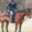

In [13]:
# take a look at one of the images
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

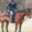

In [14]:
# display a thumbnail of the image
img.to_thumb(180)

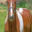

In [15]:
img = PILImage.create(img_files[3000])
img

# Define and train the model

In [16]:
#learn = cnn_learner(dls, resnet18, pretrained=False,
#                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn = cnn_learner(dls, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

In [17]:
%%time
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.788556,1.684796,0.467417,01:44


epoch,train_loss,valid_loss,accuracy,time
0,1.232065,1.114418,0.731750,02:27
1,1.086074,1.031622,0.771917,02:11


CPU times: user 6min 1s, sys: 7.81 s, total: 6min 8s
Wall time: 6min 23s


In [18]:
# create a new DataBlock object incorporating augmentation transformations
db2 = db.new(batch_tfms=aug_transforms())
# create a new dataloaders object based on the new DataBlock object
dls2 = db2.dataloaders(path,bs=32)


In [19]:
db2.summary(path/"train")

Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying parent_label gives
      truck
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(9))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad

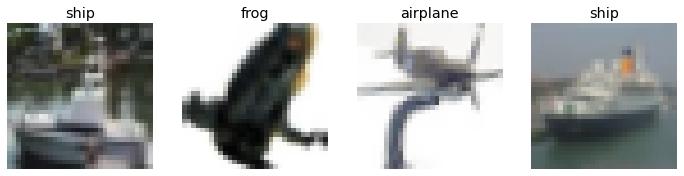

In [20]:
# examine a batch of the augmented training data
dls2.train.show_batch(max_n=4, nrows=1)

In [21]:
# define a distinct model based on the augmented dataloaders object
learn2 = cnn_learner(dls2, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

In [22]:
%%time
learn2.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.860847,1.726868,0.446500,02:03


epoch,train_loss,valid_loss,accuracy,time
0,1.289944,1.170710,0.709750,02:27
1,1.147156,1.073939,0.745667,02:28


CPU times: user 6min 46s, sys: 7.56 s, total: 6min 53s
Wall time: 6min 59s


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

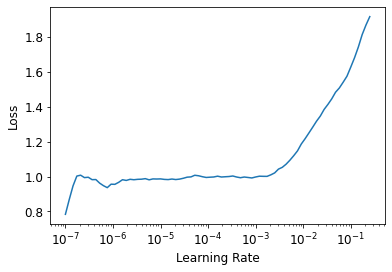

In [23]:
learn.lr_find()


In [24]:
learn.summary()

Sequential (Input shape: ['32 x 3 x 32 x 32'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 16 x 16    9,408      True      
________________________________________________________________
BatchNorm2d          32 x 64 x 16 x 16    128        True      
________________________________________________________________
ReLU                 32 x 64 x 16 x 16    0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 8 x 8      0          False     
________________________________________________________________
Conv2d               32 x 64 x 8 x 8      36,864     True      
________________________________________________________________
BatchNorm2d          32 x 64 x 8 x 8      128        True      
________________________________________________________________
ReLU                 32 x 64 x 8 x 8      0          False     
___________________________________________________

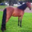

In [25]:
# take a look at one of the test images
img_test_files = get_image_files(path/"test")
img2 = PILImage.create(img_test_files[700])
img2

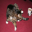

In [26]:
# select an image from the test set
img3 = PILImage.create(img_test_files[8000])
img3

In [27]:
# apply the trained model to the image
learn.predict(img2)

('horse',
 TensorImage(7),
 TensorImage([0.0085, 0.0197, 0.0065, 0.0072, 0.0079, 0.0160, 0.0072, 0.9138, 0.0049, 0.0083]))

In [28]:
# apply the trained model to the image
learn.predict(img3)

('dog',
 TensorImage(5),
 TensorImage([0.0411, 0.0107, 0.0095, 0.1704, 0.0085, 0.7080, 0.0155, 0.0243, 0.0053, 0.0068]))

In [29]:
learn.path = Path('/notebooks/temp/models')
learn.export('cifar_jun5_2021.pkl')

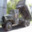

In [30]:
# select an image from the test set
img4 = PILImage.create(img_test_files[4000])
img4

In [31]:
learn.predict(img4)

('truck',
 TensorImage(9),
 TensorImage([0.0115, 0.0212, 0.0170, 0.0221, 0.0122, 0.0100, 0.0078, 0.0099, 0.0108, 0.8775]))

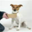

In [32]:
# take a look at a dog image from the training dataset
dog_files = get_image_files(path/"train/dog")
dog_img = PILImage.create(dog_files[30])
dog_img

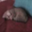

In [33]:
# take a look at a cat image from the training dataset
cat_files = get_image_files(path/"train/cat")
cat_img = PILImage.create(cat_files[30])
cat_img